In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import ydata_profiling as yp

from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,accuracy_score

In [2]:
df=pd.read_csv("E:\\BA BI\\Project BBC\\project2\\loan data.csv")
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(100514, 19)

In [4]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

In [5]:
df.dropna(subset=['Loan ID'], inplace=True)

In [6]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3f94c18c-ba8f-45d0-8610-88a684a410a9,2da51983-cfef-4b8f-a733-5dfaf69e9281,Fully Paid,147070.0,Short Term,725.0,475437.0,7 years,Own Home,other,2202.86,22.3,NaN,5.0,0.0,47766.0,658548.0,0.0,0.0
99996,06eba04f-58fc-424a-b666-ed72aa008900,77f2252a-b7d1-4b07-a746-1202a8304290,Fully Paid,99999999.0,Short Term,732.0,1289416.0,1 year,Rent,Debt Consolidation,13109.05,9.4,21.0,22.0,0.0,153045.0,509234.0,0.0,0.0
99997,e1cb4050-eff5-4bdb-a1b0-aabd3f7eaac7,2ced5f10-bd60-4a11-9134-cadce4e7b0a3,Fully Paid,103136.0,Short Term,742.0,1150545.0,6 years,Rent,Debt Consolidation,7315.57,18.8,18.0,12.0,1.0,109554.0,537548.0,1.0,0.0
99998,81ab928b-d1a5-4523-9a3c-271ebb01b4fb,3e45ffda-99fd-4cfc-b8b8-446f4a505f36,Fully Paid,530332.0,Short Term,746.0,1717524.0,9 years,Rent,Debt Consolidation,9890.07,15.0,NaN,8.0,0.0,404225.0,738254.0,0.0,0.0


In [7]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [8]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,46859.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,34.901321,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,21.997829,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,16.000000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,32.000000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,51.000000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [9]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].mean())

df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].mean())

df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].mean())

df['Months since last delinquent'] = df['Months since last delinquent'].fillna(999)

In [10]:
df.isnull().sum()

Loan ID                            0
Customer ID                        0
Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                       0
Annual Income                      0
Years in current job            4222
Home Ownership                     0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       0
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                     204
Tax Liens                         10
dtype: int64

In [11]:
df.drop(["Years in current job","Bankruptcies","Tax Liens","Loan ID","Customer ID"], axis=1, inplace=True)

In [12]:
df.isnull().sum()

Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
dtype: int64

In [13]:
df.dtypes

Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
dtype: object

In [14]:
df["Credit Score"] = df["Credit Score"].astype("int")
df["Annual Income"] = df["Annual Income"].astype("int")
df["Monthly Debt"] = df["Monthly Debt"].astype("int")
df["Years of Credit History"] = df["Years of Credit History"].astype("int")
df["Months since last delinquent"] = df["Months since last delinquent"].astype("int")
df["Number of Open Accounts"] = df["Number of Open Accounts"].astype("int")
df["Number of Credit Problems"] = df["Number of Credit Problems"].astype("int")
df["Current Credit Balance"] = df["Current Credit Balance"].astype("int")

In [15]:
df.duplicated().sum()

10215

In [16]:
df.drop_duplicates(inplace=True)
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,Fully Paid,445412.0,Short Term,709,1167493,Home Mortgage,Home Improvements,5214,17,999,6,1,228190,416746.0
1,Fully Paid,262328.0,Short Term,1076,1378276,Home Mortgage,Debt Consolidation,33295,21,8,35,0,229976,850784.0
2,Fully Paid,99999999.0,Short Term,741,2231892,Own Home,Debt Consolidation,29200,14,29,18,1,297996,750090.0
3,Fully Paid,347666.0,Long Term,721,806949,Own Home,Debt Consolidation,8741,12,999,9,0,256329,386958.0
4,Fully Paid,176220.0,Short Term,1076,1378276,Rent,Debt Consolidation,20639,6,999,15,0,253460,427174.0


In [17]:
le=LabelEncoder()

In [18]:
df['Loan Status']=le.fit_transform(df['Loan Status'])
df['Term']=le.fit_transform(df['Term'])
df['Home Ownership']=le.fit_transform(df['Home Ownership'])
df['Purpose']=le.fit_transform(df['Purpose'])

df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,1,445412.0,1,709,1167493,1,5,5214,17,999,6,1,228190,416746.0
1,1,262328.0,1,1076,1378276,1,3,33295,21,8,35,0,229976,850784.0
2,1,99999999.0,1,741,2231892,2,3,29200,14,29,18,1,297996,750090.0
3,1,347666.0,0,721,806949,2,3,8741,12,999,9,0,256329,386958.0
4,1,176220.0,1,1076,1378276,3,3,20639,6,999,15,0,253460,427174.0


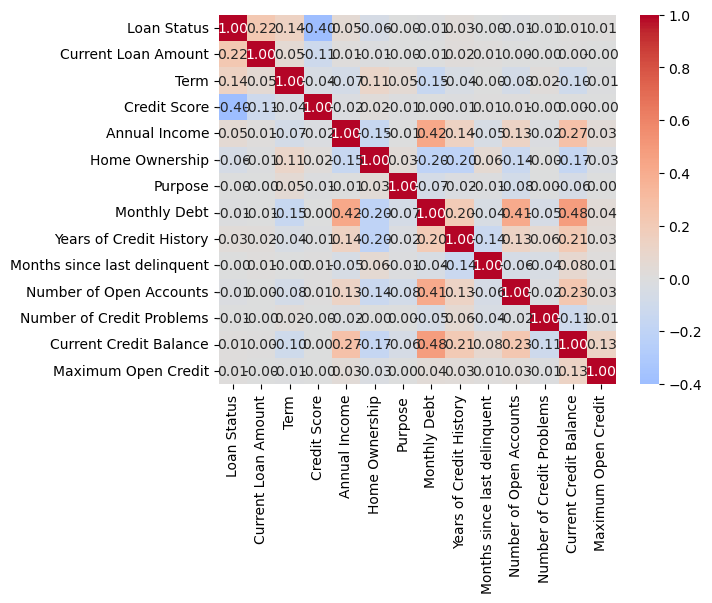

In [19]:
cor=df.corr(numeric_only=True)
sb.heatmap(cor,cmap="coolwarm",fmt=".2f",center=0,annot=True)
plt.show()

In [20]:
df.head()

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit
0,1,445412.0,1,709,1167493,1,5,5214,17,999,6,1,228190,416746.0
1,1,262328.0,1,1076,1378276,1,3,33295,21,8,35,0,229976,850784.0
2,1,99999999.0,1,741,2231892,2,3,29200,14,29,18,1,297996,750090.0
3,1,347666.0,0,721,806949,2,3,8741,12,999,9,0,256329,386958.0
4,1,176220.0,1,1076,1378276,3,3,20639,6,999,15,0,253460,427174.0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x=df.drop(["Loan Status"],axis=1)
y=df["Loan Status"]

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dtc=DecisionTreeClassifier(max_depth=7)

In [26]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [27]:
y_preds=dtc.predict(x_test)
acc=accuracy_score(y_preds,y_test)
acc

0.7953444339254887

In [28]:
from sklearn.linear_model import LinearRegression,LogisticRegression

In [29]:
lo=LogisticRegression()

In [30]:
lo.fit(x_train,y_train)

c:\Users\hansa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
y_prds=lo.predict(x_test)
accuracy=accuracy_score(y_prds,y_test)
accuracy

0.790443838057582

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [33]:
k=KNN(n_neighbors=5)

In [34]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
y_ped=k.predict(x_test)

In [36]:
acc1=accuracy_score(y_ped,y_test)
acc1

0.6996157487330846

In [37]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestRegressor

In [38]:
bc=BaggingClassifier(estimator=LogisticRegression())

In [39]:
bc.fit(x_train,y_train)

c:\Users\hansa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\hansa\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

BaggingClassifier(estimator=LogisticRegression())

In [40]:
y_predis=bc.predict(x_test)
acc2=accuracy_score(y_predis,y_test)
acc2

0.7925043158656792

In [41]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [42]:
Rtrc=RandomForestClassifier(n_estimators=100,criterion="entropy")
Rtrc.fit(x_train,y_train)
y_predics=Rtrc.predict(x_test)

In [43]:
acc3=accuracy_score(y_predics,y_test)*100
acc3

79.50103023890405

In [44]:
from sklearn.svm import SVC,SVR

In [45]:
sc=SVC(kernel="rbf")

In [46]:
sc.fit(x_train,y_train)

SVC()

In [47]:
y_predicts=sc.predict(x_test)

In [48]:
AC=accuracy_score(y_predicts,y_test)
AC

0.7447235061535892